# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Putri Rahayu Susmawati
- **Email:** prs993964@gmail.com
- **ID Dicoding:** putrirahayususmawati

## Menentukan Pertanyaan Bisnis

- Metode pembayaran mana yang paling sering digunakan oleh pelanggan?
- Apakah ada hubungan antara metode pembayaran dan status pesanan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
>>> import streamlit as st

In [ ]:
import pandas as pd

## Data Wrangling

### Gathering Data

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customers_dataset.csv to customers_dataset.csv
Saving geolocation_dataset.csv to geolocation_dataset.csv
Saving New Text Document.txt to New Text Document.txt
Saving order_items_dataset.csv to order_items_dataset.csv
Saving order_payments_dataset.csv to order_payments_dataset.csv
Saving order_reviews_dataset.csv to order_reviews_dataset.csv
Saving orders_dataset.csv to orders_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv
Saving products_dataset.csv to products_dataset.csv
Saving sellers_dataset.csv to sellers_dataset.csv


In [ ]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

orders_df = pd.read_csv(io.BytesIO(uploaded['orders_dataset.csv']))

Saving orders_dataset.csv to orders_dataset.csv


In [ ]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

payments_df = pd.read_csv(io.BytesIO(uploaded['order_payments_dataset.csv']))

Saving order_payments_dataset.csv to order_payments_dataset.csv


In [ ]:
orders_df = pd.read_csv('orders_dataset.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

In [ ]:
print(orders_df.columns)
print(payments_df.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


In [ ]:
merged_df = pd.merge(orders_df, payments_df, on='order_id')
print(merged_df.head())


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
merged_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah metode pembayaran per bulan
payment_trends = merged_df.groupby(['order_month', 'payment_type']).size().unstack()
print(payment_trends)


payment_type  boleto  credit_card  debit_card  not_defined  voucher
order_month                                                        
2016-09          NaN          4.0         NaN          NaN      NaN
2016-10         71.0        235.0         3.0          NaN     15.0
2016-12          NaN          1.0         NaN          NaN      NaN
2017-01        155.0        594.0         9.0          NaN     42.0
2017-02        343.0       1311.0        22.0          NaN    104.0
2017-03        510.0       2000.0        51.0          1.0    120.0
2017-04        443.0       1811.0        27.0          NaN    123.0
2017-05        727.0       2711.0        51.0          NaN    211.0
2017-06        598.0       2430.0        46.0          NaN    171.0
2017-07        766.0       2964.0        74.0          NaN    222.0
2017-08        852.0       3181.0        55.0          1.0    242.0
2017-09        823.0       3144.0        72.0          NaN    246.0
2017-10        860.0       3453.0        75.0   

In [ ]:
payment_counts = merged_df['payment_type'].value_counts()
print(payment_counts)


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [ ]:
payment_by_status = merged_df.groupby('order_status')['payment_value'].mean()
print(payment_by_status)


order_status
approved       120.540000
canceled       215.746386
created        137.620000
delivered      153.067428
invoiced       212.732277
processing     217.536395
shipped        151.984528
unavailable    194.883683
Name: payment_value, dtype: float64


In [ ]:
status_by_payment = merged_df.pivot_table(index='payment_type', columns='order_status', aggfunc='size', fill_value=0)
print(status_by_payment)


order_status  approved  canceled  created  delivered  invoiced  processing  \
payment_type                                                                 
boleto               0        95        2      19191        67          70   
credit_card          2       444        3      74586       239         224   
debit_card           0         7        0       1486         6           2   
not_defined          0         3        0          0         0           0   
voucher              0       115        0       5493        13          23   

order_status  shipped  unavailable  
payment_type                        
boleto            209          150  
credit_card       851          446  
debit_card         22            6  
not_defined         0            0  
voucher            84           47  


**Insight:**
- berdasarkan hasil analisis diatas dapat disimpulkan bahwa metode pembayaran yang palig sering digunakan adalah credit card
- Pesanan dengan nilai pembayaran lebih tinggi cenderung mengalami lebih banyak masalah atau penundaan, terbukti dari nilai rata-rata yang lebih tinggi pada pesanan yang canceled, processing, atau dalam tahap invoiced.
- Credit Card memiliki jumlah pesanan yang jauh lebih besar (lebih dari 74.000 yang berhasil dikirim), tetapi juga memiliki tingkat pembatalan yang relatif tinggi (444 pesanan dibatalkan).

### Assessing Data

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

missing_orders = orders_df.isnull().sum()
missing_payments = payments_df.isnull().sum()

print("Missing values in orders dataset:")
print(missing_orders)

print("\nMissing values in payments dataset:")
print(missing_payments)


Missing values in orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values in payments dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

# Mencari duplikat pada orders dataset berdasarkan kolom order_id
duplicate_orders = orders_df[orders_df.duplicated(subset=['order_id'], keep=False)]

# Mencari duplikat pada payments dataset berdasarkan kolom order_id
duplicate_payments = payments_df[payments_df.duplicated(subset=['order_id'], keep=False)]

# Menampilkan hasil duplikat
print("Duplicate entries in orders dataset:")
print(duplicate_orders)

print("\nDuplicate entries in payments dataset:")
print(duplicate_payments)


Duplicate entries in orders dataset:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

Duplicate entries in payments dataset:
                                order_id  payment_sequential payment_type  \
25      5cfd514482e22bc992e7693f0e3e8df7                   2      voucher   
35      b2bb080b6bc860118a246fd9b6fad6da                   1  credit_card   
75      3689194c14ad4e2e7361ebd1df0e77b0                   2      voucher   
84      723e462ce1ee50e024887c0b403130f3                   1  credit_card   
102     21b8b46679ea6482cbf911d960490048                   2      voucher   
...                                  ...                 ...          ...   
103778  fd86c80924b4be8fb7f58c4ecc680dae                   1  credit_card   
103817  6d4616de4341417e17978fe57aec1c46                   1  credit_card   
103860  31bc09fdbd70

In [ ]:
# mengidentifikasi outlier menggunakan IQR method
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga) untuk kolom payment_value
Q1 = payments_df['payment_value'].quantile(0.25)
Q3 = payments_df['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menetapkan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan nilai yang berada di luar batas (outliers)
outliers_payments = payments_df[(payments_df['payment_value'] < lower_bound) |
                                (payments_df['payment_value'] > upper_bound)]

print("Outliers in payment_value:")
print(outliers_payments)


Outliers in payment_value:
                                order_id  payment_sequential payment_type  \
23      4d680edbaa7d3d9bed69532957368a03                   1  credit_card   
26      d0a945f85ba1074b60aac97ade7e240e                   1  credit_card   
52      2e2c60b99754ae1e4d8b18846cfec9f2                   1  credit_card   
54      95442deb81a5d91c97c0df96b431634a                   1       boleto   
61      3ab4eea6776259ae8dfbabaeffece352                   1  credit_card   
...                                  ...                 ...          ...   
103814  df8ab61cb615d551483618533aceb364                   1  credit_card   
103843  262bf694d9c87de7844dd80b98fcfef3                   1  credit_card   
103861  691688405bcee3ff9023639514498962                   1  credit_card   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   

        payment_installments  payment_value  
23

In [ ]:
# mengidentifikasi outlier menggunakan IQR method
# Mengkonversi kolom waktu ke datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Menghitung selisih hari antara waktu pembelian dan pengiriman
orders_df['delivery_duration'] = (orders_df['order_delivered_customer_date'] -
                                  orders_df['order_purchase_timestamp']).dt.days

# Mendeteksi outlier pada kolom delivery_duration
Q3 = orders_df['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Menetapkan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan nilai outliers
outliers_orders = orders_df[(orders_df['delivery_duration'] < lower_bound) |
                            (orders_df['delivery_duration'] > upper_bound)]

print("Outliers in delivery duration:")
print(outliers_orders[['order_id', 'delivery_duration']])


Outliers in delivery duration:
                               order_id  delivery_duration
29     ecab90c9933c58908d3d6add7c6f5ae3               30.0
35     8563039e855156e48fccee4d611a3196               30.0
41     6ea2f835b4556291ffdc53fa0b3b95e8               33.0
97     6a0a8bfbbe700284feb0845d95e0867f               36.0
110    9d531c565e28c3e0d756192f84d8731f               56.0
...                                 ...                ...
99130  85a543ebc5aa8bcbbf7974c03ed49ca2               29.0
99266  76a948cd55bf22799753720d4545dd2d               47.0
99279  4cf09d9e5ebbe0f91ddd7bf9aae891cd               32.0
99423  38e9133ce29f6bbe35aed9c3863dce01               39.0
99432  cfa78b997e329a5295b4ee6972c02979               37.0

[5025 rows x 2 columns]


**Insight:**
- Terdapat Missing value pada order dataset di 3 kolom yakni order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date sedangkan pada payments dataset tidak terdapat adanya Missing value.
- pada order dataset tidak terdapat data duplicate namun pada payments dataset terdapat duplicate sebanyak 7407 baris data dengan 5 kolom
- terdapat 7981 baris yang dianggap sebagai outliers berdasarkan metode IQR pada kolom payment_value dalam payments dataset
- terdapat 5025 baris yang dianggap sebagai outliers berdasarkan metode IQR pada kolom order_delivered_customer_date dalam orders dataset

### Cleaning Data

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')

# Menampilkan 5 baris acak dari orders_df
print(orders_df.sample(5))

payments_df = pd.read_csv('order_payments_dataset.csv')

# Menampilkan 5 baris acak dari payments_df
print(payments_df.sample(5))

                               order_id                       customer_id  \
68918  a4dbe30538bb3edfdc9fe37ba1b1b3b7  4ac0daffac0a6cb85840a734b908c0f9   
58286  b277c79061d5d57c196e249f373abccb  3d2a4d705b7d68ad838c79434ff1b628   
4939   b13ea375fe9c728832688264638f84cf  0dc5884bc5ffba283678229f27e07ff9   
97344  3216bdc94713b4b433cac7f20212fcca  e28848a09b5a8507b3f864b74c9a7d22   
28551  55aeba08a7d54fd54220244c4dfdb559  e2cbf3aa452a25609a3dd8aba84071a6   

      order_status order_purchase_timestamp order_approved_at  \
68918    delivered         11/14/2017 18:21  11/14/2017 18:30   
58286    delivered         11/26/2017 20:21  11/26/2017 20:32   
4939      canceled          8/22/2018 18:52               NaN   
97344    delivered          8/14/2017 13:50   8/14/2017 14:15   
28551    delivered         11/24/2017 23:03   11/25/2017 2:14   

      order_delivered_carrier_date order_delivered_customer_date  \
68918             11/16/2017 19:44              11/22/2017 19:47   
58286     

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

missing_orders = orders_df.isnull().sum()
missing_payments = payments_df.isnull().sum()

print("Missing values in orders dataset:")
print(missing_orders)

print("\nMissing values in payments dataset:")
print(missing_payments)

Missing values in orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values in payments dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
# Menghapus baris yang memiliki missing values
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

# Cek ulang apakah missing values telah dihapus
print(orders_df.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [ ]:
# Memastikan dataset asli tersimpan dengan perubahan
orders_df_clean = orders_df.copy()

# Cek ulang hasilnya
print(orders_df_clean.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [ ]:
# Menampilkan baris duplikat berdasarkan seluruh kolom
duplicates_orders = orders_df[orders_df.duplicated()]
duplicates_payments = payments_df[payments_df.duplicated()]

# Menampilkan duplikat di dataset orders
print("Duplicate rows in orders dataset:")
print(duplicates_orders)

# Menampilkan duplikat di dataset payments
print("Duplicate rows in payments dataset:")
print(duplicates_payments)


Duplicate rows in orders dataset:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []
Duplicate rows in payments dataset:
Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []


In [ ]:
import os

# List semua file di directory
print("Files in /content:")
print(os.listdir("/content"))


Files in /content:
['.config', 'orders_dataset.csv', 'order_payments_dataset.csv', 'sample_data']


In [ ]:
import pandas as pd

file_path_orders = '/content/orders_dataset.csv'
file_path_payments = '/content/order_payments_dataset.csv'

try:
    orders_df = pd.read_csv(file_path_orders)
    payments_df = pd.read_csv(file_path_payments)
    print("Files loaded successfully.")

    def remove_outliers(df, column_name):
        # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Menetapkan batas bawah dan atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter untuk menghapus data yang merupakan outlier
        df_clean = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        return df_clean

    # Hapus outlier pada payments_df berdasarkan kolom 'payment_value'
    payments_df_clean = remove_outliers(payments_df, 'payment_value')
    print("Dataset payments setelah menghapus outliers pada 'payment_value':")
    print(payments_df_clean)


    orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
    orders_df['order_purchase_timestamp'] = orders_df['order_purchase_timestamp'].astype('int64', errors='ignore') // 1e9  
    
    orders_df_clean = remove_outliers(orders_df, 'order_purchase_timestamp')
    print("Dataset orders setelah menghapus outliers pada 'order_purchase_timestamp':")
    print(orders_df_clean)

except FileNotFoundError:
    print("Error: One or both of the files were not found in /content directory.")


Files loaded successfully.
Dataset payments setelah menghapus outliers pada 'payment_value':
                                order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103879  c45067032fd84f4cf408730ff5205568                   1  credit_card   
103880  7159096c5aa9be77f7f0c26c01ee9793                   1  credit_card   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1

Statistik deskriptif 'payment_value' setelah pembersihan:
count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

Statistik deskriptif 'order_purchase_timestamp' setelah pembersihan:
count    9.943700e+04
mean     1.514711e+09
std      1.327471e+07
min      1.475446e+09
25%      1.505230e+09
50%      1.516317e+09
75%      1.525449e+09
max      1.539797e+09
Name: order_purchase_timestamp, dtype: float64

Outliers tersisa pada 'payment_value':
                                order_id  payment_sequential payment_type  \
8       1f78449c87a54faf9e96e88ba1491fa9                   1  credit_card   
24      8cd68144cdb62dc0d60848cf8616d2a4                   1       boleto   
87      198298d54f269d8c5fe89e85a859af61                   1  credit_card   
177     b545ba7b0bd67a3128185c7214704319                   1  credit_card   
230     251d

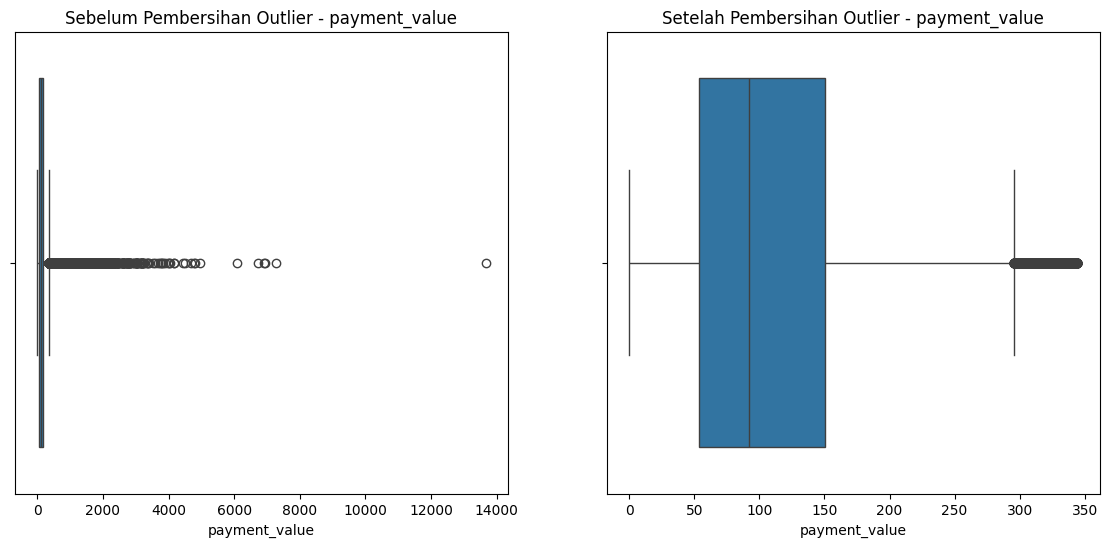

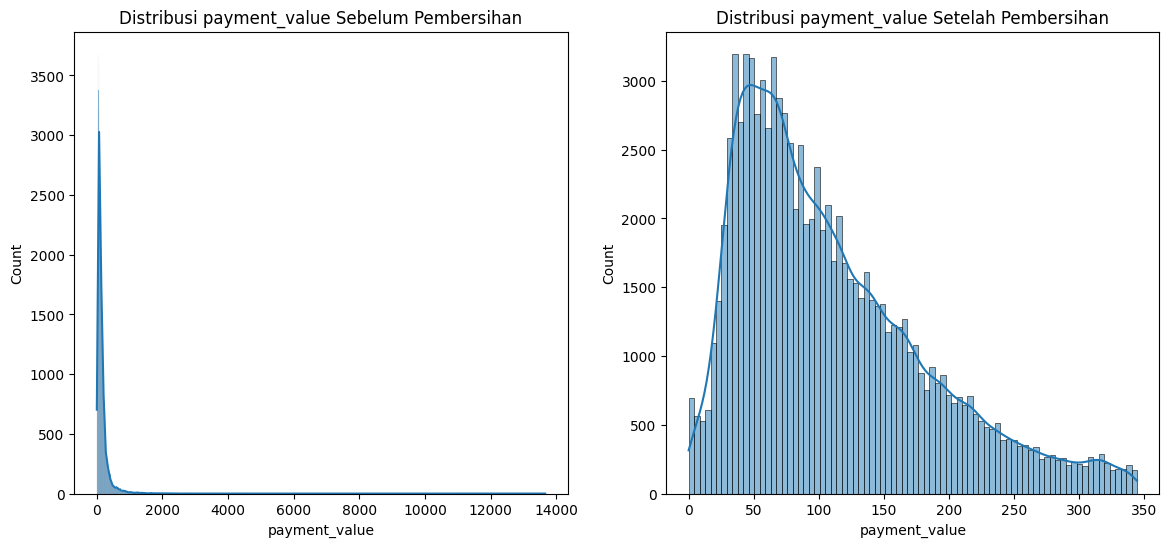

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Statistik deskriptif 'payment_value' setelah pembersihan:")
print(payments_df_clean['payment_value'].describe())

print("\nStatistik deskriptif 'order_purchase_timestamp' setelah pembersihan:")
print(orders_df_clean['order_purchase_timestamp'].describe())

# Cek ulang outlier untuk memastikan data sudah bersih
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

# Cek apakah ada outlier yang tersisa pada 'payment_value' dan 'order_purchase_timestamp'
remaining_outliers_payments = detect_outliers(payments_df_clean, 'payment_value')
remaining_outliers_orders = detect_outliers(orders_df_clean, 'order_purchase_timestamp')

print("\nOutliers tersisa pada 'payment_value':")
print(remaining_outliers_payments)

print("\nOutliers tersisa pada 'order_purchase_timestamp':")
print(remaining_outliers_orders)

# Visualisasi data sebelum dan sesudah pembersihan outlier
plt.figure(figsize=(14, 6))

# Boxplot untuk kolom 'payment_value' sebelum dan sesudah pembersihan
plt.subplot(1, 2, 1)
sns.boxplot(x=payments_df['payment_value'])
plt.title("Sebelum Pembersihan Outlier - payment_value")

plt.subplot(1, 2, 2)
sns.boxplot(x=payments_df_clean['payment_value'])
plt.title("Setelah Pembersihan Outlier - payment_value")

plt.show()

# Plot tambahan untuk kolom 'order_purchase_timestamp'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(payments_df['payment_value'], kde=True)
plt.title("Distribusi payment_value Sebelum Pembersihan")

plt.subplot(1, 2, 2)
sns.histplot(payments_df_clean['payment_value'], kde=True)
plt.title("Distribusi payment_value Setelah Pembersihan")

plt.show()


In [ ]:
# Hapus outlier yang masih tersisa pada kolom 'payment_value' di payments_df_clean
payments_df_final = payments_df_clean[~payments_df_clean.index.isin(remaining_outliers_payments.index)]

# Tampilkan ukuran data setelah pembersihan akhir
print("Data setelah menghapus outliers akhir:")
print(payments_df_final.shape)


Data setelah menghapus outliers akhir:
(93388, 5)


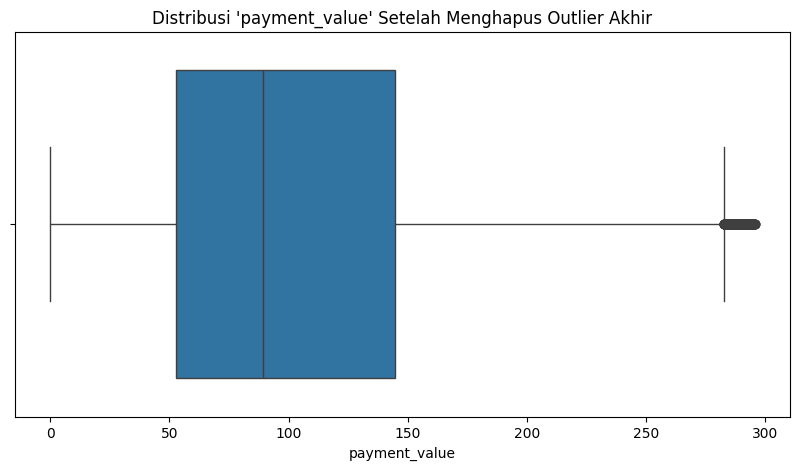

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk payment_value setelah pembersihan akhir
plt.figure(figsize=(10, 5))
sns.boxplot(x=payments_df_final['payment_value'])
plt.title("Distribusi 'payment_value' Setelah Menghapus Outlier Akhir")
plt.show()


In [ ]:
# Menyimpan dataset yang sudah dibersihkan
payments_df_final.to_csv("payments_df_cleaned.csv", index=False)
print("Data sudah disimpan sebagai 'payments_df_cleaned.csv'")


Data sudah disimpan sebagai 'payments_df_cleaned.csv'


In [ ]:
import os

# List semua file di directory
print("Files in /content:")
print(os.listdir("/content"))

Files in /content:
['.config', 'orders_dataset.csv', 'order_payments_dataset.csv', 'payments_df_cleaned.csv', 'sample_data']


In [ ]:
import pandas as pd

payments_df = pd.read_csv('payments_df_cleaned.csv')

# Mencari duplikat pada payments dataset berdasarkan kolom order_id
duplicate_payments = payments_df[payments_df.duplicated(subset=['order_id'], keep=False)]

print("\nDuplicate entries in payments dataset:")
print(duplicate_payments)


Duplicate entries in payments dataset:
                               order_id  payment_sequential payment_type  \
31     b2bb080b6bc860118a246fd9b6fad6da                   1  credit_card   
66     3689194c14ad4e2e7361ebd1df0e77b0                   2      voucher   
75     723e462ce1ee50e024887c0b403130f3                   1  credit_card   
92     21b8b46679ea6482cbf911d960490048                   2      voucher   
111    ea9184ad433a404df1d72fa0a8764232                   4      voucher   
...                                 ...                 ...          ...   
93291  fd86c80924b4be8fb7f58c4ecc680dae                   1  credit_card   
93325  6d4616de4341417e17978fe57aec1c46                   1  credit_card   
93365  31bc09fdbd701a7a4f9b55b5955b8687                   6      voucher   
93373  c9b01bef18eb84888f0fd071b8413b38                   1  credit_card   
93378  d41f1036712e18ee525939d08b7a1c98                   1  credit_card   

       payment_installments  payment_value  
31

In [ ]:
# Melihat jumlah baris sebelum menghapus duplikat
print("Jumlah baris sebelum menghapus duplikat:", payments_df.shape[0])

# Menghapus data duplikat berdasarkan semua kolom
payments_df_clean = payments_df.drop_duplicates()

# Melihat jumlah baris setelah menghapus duplikat
print("Jumlah baris setelah menghapus duplikat:", payments_df_clean.shape[0])

# Mengecek apakah masih ada duplikat
duplicates_remaining = payments_df_clean.duplicated().sum()
print("Jumlah duplikat yang tersisa setelah pembersihan:", duplicates_remaining)


Jumlah baris sebelum menghapus duplikat: 93388
Jumlah baris setelah menghapus duplikat: 93388
Jumlah duplikat yang tersisa setelah pembersihan: 0


In [ ]:
# Mengecek ulang duplikat setelah pembersihan
duplicates_remaining = payments_df_clean.duplicated().sum()

# Menampilkan hasil
if duplicates_remaining > 0:
    print(f"Masih terdapat {duplicates_remaining} duplikat yang tersisa dalam dataset.")
else:
    print("Tidak ada duplikat yang tersisa dalam dataset.")


Tidak ada duplikat yang tersisa dalam dataset.


In [ ]:
# Menyimpan dataset payments_df_clean yang sudah bersih
payments_df_clean.to_csv("payments_df_cleaned.csv", index=False)
print("Dataset yang sudah bersih telah disimpan sebagai 'payments_df_cleaned.csv'")


Dataset yang sudah bersih telah disimpan sebagai 'payments_df_cleaned.csv'


In [ ]:
import pandas as pd

payments_df_cleaned = pd.read_csv("payments_df_cleaned.csv")

# Cek duplikat
duplicates = payments_df_cleaned.duplicated().sum()
if duplicates > 0:
    print(f"Masih terdapat {duplicates} duplikat dalam dataset.")
else:
    print("Tidak ada duplikat yang tersisa dalam dataset.")

# Cek missing values
missing_values = payments_df_cleaned.isnull().sum()
print("\nJumlah missing values per kolom:")
print(missing_values[missing_values > 0])  # Menampilkan kolom yang memiliki missing values saja

# Cek outliers di kolom 'payment_value' menggunakan metode IQR
Q1 = payments_df_cleaned['payment_value'].quantile(0.25)
Q3 = payments_df_cleaned['payment_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = payments_df_cleaned[(payments_df_cleaned['payment_value'] < lower_bound) |
                               (payments_df_cleaned['payment_value'] > upper_bound)]

print(f"\nJumlah outliers pada 'payment_value': {len(outliers)}")


Tidak ada duplikat yang tersisa dalam dataset.

Jumlah missing values per kolom:
Series([], dtype: int64)

Jumlah outliers pada 'payment_value': 740


In [ ]:
# Menghitung Q1 dan Q3 untuk kolom payment_value
Q1 = payments_df_cleaned['payment_value'].quantile(0.25)
Q3 = payments_df_cleaned['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menetapkan batas bawah dan atas untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers di luar batas IQR
payments_df_no_outliers = payments_df_cleaned[(payments_df_cleaned['payment_value'] >= lower_bound) &
                                              (payments_df_cleaned['payment_value'] <= upper_bound)]

# Melihat jumlah baris setelah pembersihan
print(f"Jumlah data setelah menghapus outliers: {payments_df_no_outliers.shape[0]}")

# Menyimpan ulang data yang sudah bebas dari outliers
payments_df_no_outliers.to_csv("payments_df_no_outliers.csv", index=False)
print("Dataset yang sudah bersih dari outliers telah disimpan sebagai 'payments_df_no_outliers.csv'")


Jumlah data setelah menghapus outliers: 92648
Dataset yang sudah bersih dari outliers telah disimpan sebagai 'payments_df_no_outliers.csv'


In [ ]:
import pandas as pd

payments_df_no_outliers = pd.read_csv('payments_df_no_outliers.csv')

print(payments_df_no_outliers.head())



                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [ ]:
# Hitung Q1 dan Q3 untuk kolom payment_value
Q1 = payments_df_no_outliers['payment_value'].quantile(0.25)
Q3 = payments_df_no_outliers['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Tetapkan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cari outlier yang berada di luar batas IQR
outliers = payments_df_no_outliers[(payments_df_no_outliers['payment_value'] < lower_bound) |
                                   (payments_df_no_outliers['payment_value'] > upper_bound)]

# Menampilkan jumlah outliers yang tersisa
print(f"Jumlah outliers pada 'payment_value' setelah pembersihan: {len(outliers)}")

if not outliers.empty:
    print(outliers.head())


Jumlah outliers pada 'payment_value' setelah pembersihan: 222
                              order_id  payment_sequential payment_type  \
332   817e8b5495d2b31da82dfe5a89aacdba                   1  credit_card   
410   189ede25eb8522abcbd3592d08811f85                   1       boleto   
456   6eab6f37ff2d390d23be84642739b500                   1  credit_card   
926   916be5eed428af45e462f039ef65ca24                   1  credit_card   
1278  13359bb817972f7492a922fa64a69cad                   1  credit_card   

      payment_installments  payment_value  
332                      8         281.50  
410                      1         280.08  
456                      5         279.40  
926                      2         281.73  
1278                     1         279.30  


In [ ]:
import pandas as pd

payments_df_no_outliers = pd.read_csv('payments_df_no_outliers.csv')

# Menghitung Q1 dan Q3 untuk kolom 'payment_value'
Q1 = payments_df_no_outliers['payment_value'].quantile(0.25)
Q3 = payments_df_no_outliers['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menggunakan faktor 2.0 untuk menetapkan batas bawah dan atas
lower_bound = Q1 - 2.0 * IQR
upper_bound = Q3 + 2.0 * IQR

# Mendeteksi outliers
outliers = payments_df_no_outliers[(payments_df_no_outliers['payment_value'] < lower_bound) |
                                   (payments_df_no_outliers['payment_value'] > upper_bound)]

# Menampilkan jumlah outliers 
print(f"\nJumlah outliers pada 'payment_value' setelah re-evaluasi dengan threshold 2.0: {len(outliers)}")

if not outliers.empty:
    print(outliers.head())

# Menghapus outliers di luar batas IQR yang baru
payments_df_less_outliers = payments_df_no_outliers[(payments_df_no_outliers['payment_value'] >= lower_bound) &
                                                    (payments_df_no_outliers['payment_value'] <= upper_bound)]

# Melihat jumlah data setelah menghapus outliers
print(f"\nJumlah data setelah menghapus outliers dengan threshold 2.0: {payments_df_less_outliers.shape[0]}")

# Menyimpan ulang data yang sudah bersih dari outliers 
payments_df_less_outliers.to_csv("payments_df_less_outliers.csv", index=False)
print("Dataset yang sudah dibersihkan lebih lanjut disimpan sebagai 'payments_df_less_outliers.csv'.")



Jumlah outliers pada 'payment_value' setelah re-evaluasi dengan threshold 2.0: 0

Jumlah data setelah menghapus outliers dengan threshold 2.0: 92648
Dataset yang sudah dibersihkan lebih lanjut disimpan sebagai 'payments_df_less_outliers.csv'.


In [ ]:
import pandas as pd

payments_df_less_outliers = pd.read_csv('payments_df_less_outliers.csv')

# Menghitung Q1 dan Q3 untuk kolom 'payment_value'
Q1 = payments_df_less_outliers['payment_value'].quantile(0.25)
Q3 = payments_df_less_outliers['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menggunakan faktor 2.0 untuk menetapkan batas bawah dan atas
lower_bound = Q1 - 2.0 * IQR
upper_bound = Q3 + 2.0 * IQR

# Mendeteksi outliers
outliers_after_recheck = payments_df_less_outliers[(payments_df_less_outliers['payment_value'] < lower_bound) |
                                                   (payments_df_less_outliers['payment_value'] > upper_bound)]

# Menampilkan jumlah outliers setelah evaluasi
print(f"\nJumlah outliers pada 'payment_value' setelah re-evaluasi dengan threshold 2.0: {len(outliers_after_recheck)}")

if not outliers_after_recheck.empty:
    print(outliers_after_recheck.head())



Jumlah outliers pada 'payment_value' setelah re-evaluasi dengan threshold 2.0: 0


In [ ]:
import pandas as pd

payments_df = pd.read_csv('payments_df_less_outliers.csv')

missing_payments = payments_df.isnull().sum()

print("\nMissing values in payments dataset:")
print(missing_payments)


Missing values in payments dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
import pandas as pd

data = pd.read_csv('payments_df_less_outliers.csv')

# Mencari duplicate
duplicate_rows = data[data.duplicated()]

# Menampilkan duplicate
print(duplicate_rows)


Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []


In [ ]:
from google.colab import files
files.download('payments_df_less_outliers.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

# List semua file di directory
print("Files in /content:")
print(os.listdir("/content"))

Files in /content:
['.config', 'sample_data']


In [ ]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

orders_df = pd.read_csv(io.BytesIO(uploaded['orders_dataset.csv']))

Saving orders_dataset.csv to orders_dataset.csv


In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')

missing_orders = orders_df.isnull().sum()

print("Missing values in orders dataset:")
print(missing_orders)


Missing values in orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')

# Menghapus baris dengan missing values pada orders_df
orders_df_cleaned = orders_df.dropna()

# Melihat jumlah baris dan kolom setelah menghapus missing values
print(f"Jumlah data setelah menghapus missing values: {orders_df_cleaned.shape}")

# Menyimpan dataset yang sudah bersih
orders_df_cleaned.to_csv("orders_df_cleaned.csv", index=False)
print("Dataset yang sudah bersih dari missing values telah disimpan sebagai 'orders_df_cleaned.csv'")

Jumlah data setelah menghapus missing values: (96461, 8)
Dataset yang sudah bersih dari missing values telah disimpan sebagai 'orders_df_cleaned.csv'


In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_df_cleaned.csv')

# Mencari duplikat pada orders dataset berdasarkan kolom order_id
duplicate_orders = orders_df[orders_df.duplicated(subset=['order_id'], keep=False)]

# Menampilkan hasil duplikat
print("Duplicate entries in orders dataset:")
print(duplicate_orders)


Duplicate entries in orders dataset:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_df_cleaned.csv')

missing_orders = orders_df.isnull().sum()

print("Missing values in orders dataset:")
print(missing_orders)

Missing values in orders dataset:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [ ]:
import os

# List semua file di directory
print("Files in /content:")
print(os.listdir("/content"))

Files in /content:
['.config', 'orders_dataset.csv', 'orders_df_cleaned.csv', 'sample_data']


In [ ]:
from google.colab import files
files.download('orders_df_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

orders_df_cleaned = pd.read_csv('orders_df_cleaned.csv')

orders_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(orders_df_cleaned['order_purchase_timestamp'])
orders_df_cleaned['order_approved_at'] = pd.to_datetime(orders_df_cleaned['order_approved_at'])
orders_df_cleaned['order_delivered_carrier_date'] = pd.to_datetime(orders_df_cleaned['order_delivered_carrier_date'])
orders_df_cleaned['order_delivered_customer_date'] = pd.to_datetime(orders_df_cleaned['order_delivered_customer_date'])
orders_df_cleaned['order_estimated_delivery_date'] = pd.to_datetime(orders_df_cleaned['order_estimated_delivery_date'])


orders_df_cleaned['delivery_duration'] = (orders_df_cleaned['order_delivered_customer_date'] - orders_df_cleaned['order_purchase_timestamp']).dt.days

Q1 = orders_df_cleaned['delivery_duration'].quantile(0.25)
Q3 = orders_df_cleaned['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Menetapkan batas bawah dan atas untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data untuk menghapus outliers
orders_df_no_outliers = orders_df_cleaned[(orders_df_cleaned['delivery_duration'] >= lower_bound) &
                                          (orders_df_cleaned['delivery_duration'] <= upper_bound)]

# Mengecek jumlah baris setelah pembersihan
print(f"Jumlah data setelah menghapus outliers: {orders_df_no_outliers.shape}")

# Menyimpan dataset yang sudah bersih dari outliers
orders_df_no_outliers.to_csv("orders_df_no_outliers.csv", index=False)
print("Dataset yang sudah bersih dari outliers telah disimpan sebagai 'orders_df_no_outliers.csv'")


Jumlah data setelah menghapus outliers: (91436, 9)
Dataset yang sudah bersih dari outliers telah disimpan sebagai 'orders_df_no_outliers.csv'


In [ ]:
from google.colab import files
files.download('orders_df_no_outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insight:**
- menghapus missing value pada dataset orders_dataset di kolom order_approved_at sebanyak 160 baris, order_delivered_carrier_date sebanyak 1783 baris dan order_delivered_customer_date sebanyak 2965 baris
- dataset order_payments_dataset berhasil dibersihkan dan simpan di payments_df_less_outliers.csv
- dataset orders_dataset.csv berhasil dibersihkan dan simpan di orders_df_no_outliers.csv

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

Saving orders_df_no_outliers.csv to orders_df_no_outliers.csv


In [ ]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

Saving payments_df_less_outliers.csv to payments_df_less_outliers.csv


In [ ]:
import pandas as pd
orders_df = pd.read_csv('orders_df_no_outliers.csv')

orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
count,91436,91436,91436,91436,91436,91436,91436,91436,91436.000000
unique,91436,91436,2,82372,47923,58708,72457,441,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:06:00,2018-01-10 10:32:00,2018-05-09 15:48:00,2018-05-21 19:28:00,2018-07-18,NaN
freq,1,1,91433,28,100,45,7,482,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.558270
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.060468
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000


In [ ]:
import pandas as pd
payments_df = pd.read_csv('payments_df_less_outliers.csv')
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,92648,92648.000000,92648,92648.000000,92648.000000
unique,88404,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,67647,NaN,NaN
mean,NaN,1.102420,NaN,2.563639,102.974021
std,NaN,0.745983,NaN,2.390849,63.195506
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,52.780000
50%,NaN,1.000000,NaN,1.000000,88.710000
75%,NaN,1.000000,NaN,3.000000,143.150000


array([[<Axes: title={'center': 'delivery_duration'}>]], dtype=object)

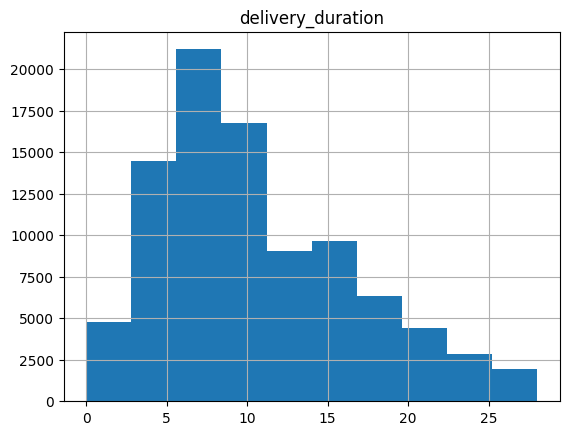

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_df_no_outliers.csv')

orders_df.hist()

array([[<Axes: title={'center': 'payment_sequential'}>,
        <Axes: title={'center': 'payment_installments'}>],
       [<Axes: title={'center': 'payment_value'}>, <Axes: >]],
      dtype=object)

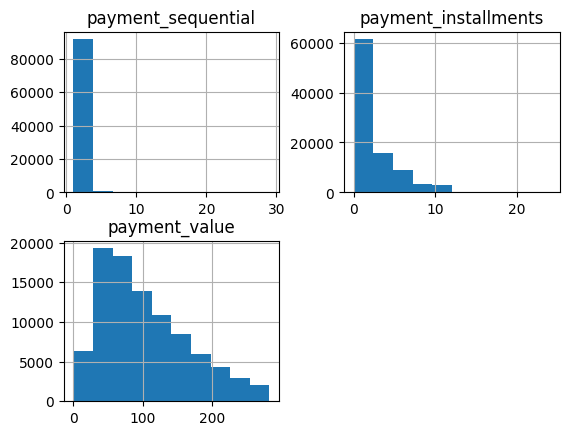

In [ ]:
import pandas as pd
payments_df = pd.read_csv('payments_df_less_outliers.csv')
payments_df.hist()

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_df_no_outliers.csv')
numeric_df = orders_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                   delivery_duration
delivery_duration                1.0


In [ ]:
import pandas as pd

payments_df = pd.read_csv('payments_df_less_outliers.csv')
numeric_df = payments_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                      payment_sequential  payment_installments  payment_value
payment_sequential              1.000000             -0.086404      -0.153573
payment_installments           -0.086404              1.000000       0.349424
payment_value                  -0.153573              0.349424       1.000000


In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_df_no_outliers.csv')
payments_df = pd.read_csv('payments_df_less_outliers.csv')

merged_df = pd.merge(orders_df, payments_df, on='order_id')

grouped_df = merged_df.groupby(['payment_type', 'order_status']).agg(
    count=('payment_value', 'size'),
    mean_payment=('payment_value', 'mean')
).unstack(fill_value=0)

grouped_df

count           mean_payment            
order_status canceled delivered     canceled   delivered
payment_type                                            
boleto              0     16507         0.00   99.918903
credit_card         3     62563       171.79  107.020331
debit_card          0      1322         0.00   98.228169
voucher             0      5122         0.00   53.102567

**Insight:**
- Secara keseluruhan, data pada dataset orders_df_no_outliers.csv menunjukkan efisiensi sistem pesanan dan pengiriman, dengan mayoritas pesanan disetujui dan dikirim dalam waktu yang wajar sesuai estimasi. histogram menunjukkan bahwa sebagian besar pesanan berhasil dikirimkan dalam jangka waktu yang wajar (0-10 hari), tetapi ada beberapa pengiriman yang membutuhkan waktu lebih lama, meskipun jumlahnya sedikit.
- Secara keseluruhan, data pada dataset payments_df_less_outliers.csv ini menunjukkan bahwa sebagian besar pelanggan menggunakan metode kartu kredit dan melakukan pembayaran penuh dalam satu kali transaksi atau hanya sedikit cicilan. Namun, ada fleksibilitas bagi pelanggan untuk membayar dengan lebih banyak cicilan, yang mungkin menjadi opsi yang populer di antara beberapa pelanggan. histogram menunjukkan Sebagian besar pelanggan melakukan pembayaran penuh dalam satu transaksi, atau menggunakan cicilan rendah jika mereka memilih cicilan. korelasi menunjukkan ada kecenderungan bahwa nilai pembayaran yang lebih tinggi seringkali dihubungkan dengan lebih banyak cicilan. Jumlah urutan pembayaran (payment_sequential) tidak memiliki hubungan kuat dengan cicilan atau nilai pembayaran.
- Pembayaran dengan credit card adalah yang paling sering digunakan dengan total 62,563 transaksi berhasil (delivered).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran mana yang paling sering digunakan oleh pelanggan?

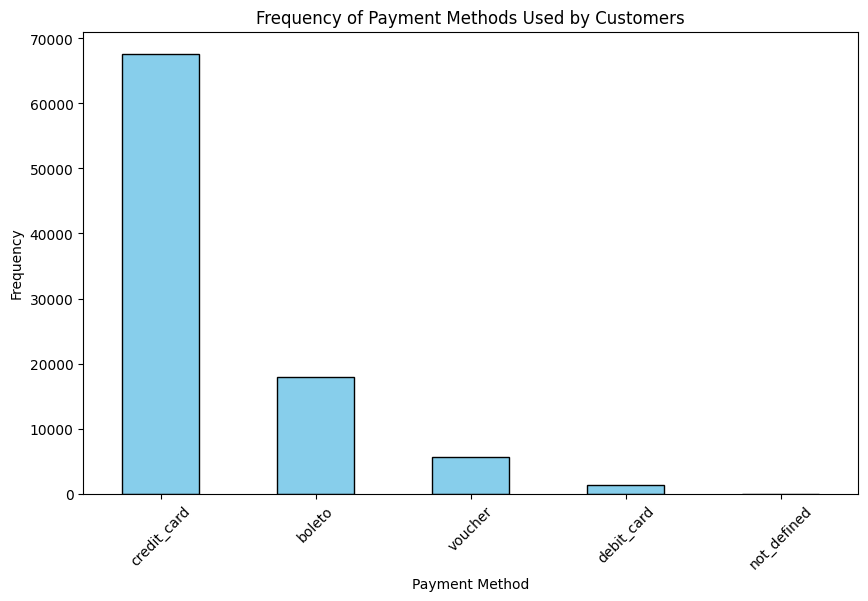

In [ ]:
import matplotlib.pyplot as plt

payment_counts = payments_df['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Payment Methods Used by Customers')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2: Apakah ada hubungan antara metode pembayaran dan status pesanan?

order_status  canceled  delivered
payment_type                     
boleto               0      16507
credit_card          3      62563
debit_card           0       1322
voucher              0       5122


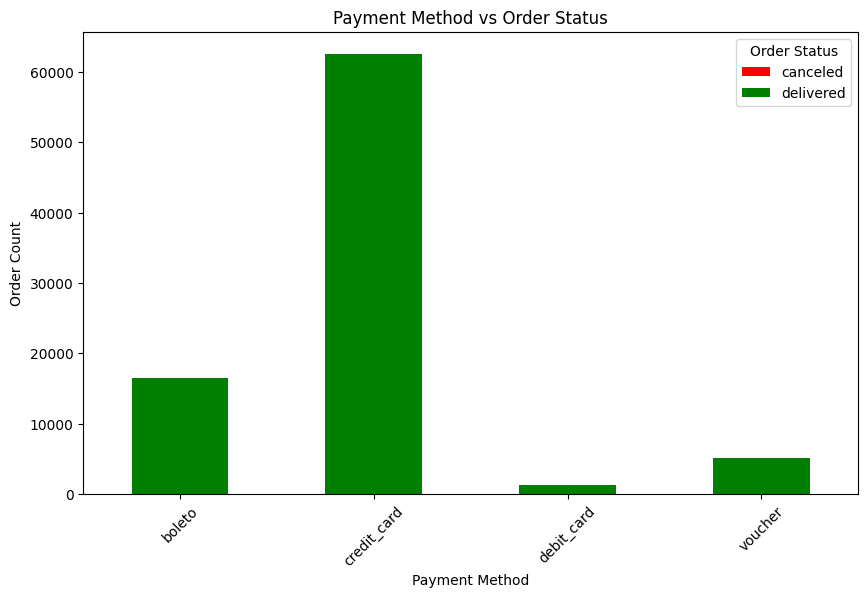

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.merge(orders_df, payments_df, on='order_id', how='inner')

status_counts = pd.crosstab(merged_df['payment_type'], merged_df['order_status'])

print(status_counts)

status_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Payment Method vs Order Status')
plt.xlabel('Payment Method')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.legend(title='Order Status')
plt.show()


In [ ]:
import pandas as pd

all_df = pd.merge(orders_df, payments_df, on='order_id', how='inner')

all_df.to_csv("all_data.csv", index=False)

**Insight:**
- Kartu Kredit (credit_card) adalah metode pembayaran yang paling sering digunakan oleh pelanggan, dengan frekuensi yang jauh lebih tinggi dibandingkan metode pembayaran lainnya.
- Semua metode pembayaran memiliki status "delivered" yang tinggi, terutama credit_card dengan jumlah pesanan terkirim paling banyak, diikuti oleh boleto, voucher, dan debit_card. Hal ini menunjukkan bahwa metode pembayaran credit_card adalah yang paling dominan untuk pesanan yang berhasil dikirimkan.
- Hanya metode credit_card yang memiliki pesanan dengan status "canceled" (sebanyak 3 pesanan). Sedangkan metode pembayaran lainnya tidak memiliki pesanan yang dibatalkan sama sekali. Ini bisa menunjukkan bahwa pesanan dengan metode pembayaran credit_card memiliki kemungkinan kecil untuk dibatalkan, meskipun frekuensinya sangat rendah (hanya 3 dari puluhan ribu pesanan).
- dapat disimpulkan bahwa Tidak ada hubungan signifikan antara metode pembayaran dan status pesanan, karena sebagian besar pesanan berhasil dikirim untuk setiap metode. Namun, metode credit_card menunjukkan sedikit pembatalan, meskipun dalam jumlah yang sangat kecil dibandingkan dengan pesanan yang berhasil dikirim.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2